In [1]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.legend import Legend
import numpy as np
from matplotlib.font_manager import FontProperties

def sorting_key(s):
    # Extract numeric and alphabetic parts
    num = int(re.search(r'\d+', s).group())
    letter = re.search(r'[A-Za-z]+', s).group()
    is_optimal = (letter == 'Optimal')  # Force Optimal last
    return (is_optimal, letter, num)
    #return (num, letter)

# Custom sorting key function
def sorting_key_2(s):
    # Extract numeric and alphabetic parts
    match = re.match(r'([A-Za-z]+)_(\d+)', s)
    if match:
        letter, num = match.groups()
        num = int(num)
    else:
        letter, num = s, 0  # Default values if the string doesn't match the expected format

    is_optimal = (letter == 'Optimal')  # Force Optimal last
    return (is_optimal, letter, num)

# Create directory if it doesn't exist
output_dir = 'slice_cache'
os.makedirs(output_dir, exist_ok=True)

custom_palette = [
    '#7402d8', '#7f7f7f', '#ff7f0e', '#2ca02c', '#d62728',
    '#9467bd', '#8c564b', '#e377c2', '#c7c7c7', '#bcbd22',
    '#17becf', '#aec7e8', '#ffbb78', '#98df8a', '#ff9896',
    '#c5b0d5', '#c49c94', '#1f77b4', '#f7b6d2', '#dbdb8d'
]


df = pd.read_csv("slice-cache-micro-benchmarks.csv")
df['cacheHitPercentage'] = df['cacheHits'] / (df['cacheHits'] + df['cacheMisses'])
df['minMaxDelay'] = df['minDelay'].astype(str) + "_" + df['maxDelay'].astype(str)
df['windowSizeSlide'] = df['windowSize'].astype(str) + "_" + df['windowSlide'].astype(str)
df['optimalCacheHitPercentage'] = df['optimalCacheHits'] / (df['optimalCacheHits'] + df['optimalCacheMisses'])
df['cacheHitPercentageFromOptimal'] = (df['cacheHits'] - df['optimalCacheHits']) / df['cacheHits']
df['absoluteCacheHitsFromOptimal'] = df['optimalCacheHits'] - df['cacheHits']
df['absoluteCacheMissesFromOptimal'] = df['cacheMisses'] - df['optimalCacheMisses']
df['sliceCacheType_NoEntries'] = df['sliceCacheType'].astype(str) + "_" + df['numberOfEntries'].astype(str)
df['executionTime_in_ms'] = df['executionTime'] / 1000
df['throughput_timestamp_per_sec'] = (df['numberOfTimestamps']) / (df['executionTime_in_ms'] / 1000)
df['throughput_million_timestamp_per_sec'] = (df['numberOfTimestamps']) / (df['executionTime_in_ms'] / 1000) / (1000 * 1000)
df['cacheHitPercentage'] = df['cacheHitPercentage'] * 100
df['outOfOrderPercentage'] = df['outOfOrderPercentage'] * 100
df = df.sort_values(by='sliceCacheType_NoEntries', key=lambda x: x.map(sorting_key))


# Removing all rows that do not fit the following criteria
numberOfEntries = [2, 5, 10, 25, 50]
sliceCacheType = ["FIFO", "TWO_QUEUES", "LRU", "SECOND_CHANCE"] #, "Optimal"]
df = df[
    df['numberOfEntries'].isin(numberOfEntries) &
    df['sliceCacheType'].isin(sliceCacheType)
]
df

,sliceCacheType,numberOfEntries,outOfOrderPercentage,numberOfTimestamps,minDelay,maxDelay,windowSize,windowSlide,executionTime,cacheHits,...,minMaxDelay,windowSizeSlide,optimalCacheHitPercentage,cacheHitPercentageFromOptimal,absoluteCacheHitsFromOptimal,absoluteCacheMissesFromOptimal,sliceCacheType_NoEntries,executionTime_in_ms,throughput_timestamp_per_sec,throughput_million_timestamp_per_sec
182,FIFO,2,70.0,1000000,1000,500000,1000,1000,5254,161492,...,1000_500000,1000_1000,0.308766,-0.911958,147274,147274,FIFO_2,5.254,1.903312e+08,190.331176
228,FIFO,2,90.0,1000000,1000,500000,1000,1000,5728,30097,...,1000_500000,1000_1000,0.113455,-2.769645,83358,83358,FIFO_2,5.728,1.745810e+08,174.581006
64,FIFO,2,20.0,1000000,1000,500000,1000,1000,2198,730415,...,1000_500000,1000_1000,0.802014,-0.098025,71599,71599,FIFO_2,2.198,4.549591e+08,454.959054
62,FIFO,2,20.0,1000000,1000,500000,1000,1000,2181,730415,...,1000_500000,1000_1000,0.802014,-0.098025,71599,71599,FIFO_2,2.181,4.585053e+08,458.505273
60,FIFO,2,20.0,1000000,1000,500000,1000,1000,2281,730415,...,1000_500000,1000_1000,0.802014,-0.098025,71599,71599,FIFO_2,2.281,4.384042e+08,438.404209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,TWO_QUEUES,50,50.0,1000000,1000,500000,1000,1000,42795,552497,...,1000_500000,1000_1000,0.719702,-0.302635,167205,167205,TWO_QUEUES_50,42.795,2.336722e+07,23.367216
1442,TWO_QUEUES,50,50.0,1000000,1000,500000,1000,1000,42459,552497,...,1000_500000,1000_1000,0.719702,-0.302635,167205,167205,TWO_QUEUES_50,42.459,2.355213e+07,23.552133
1444,TWO_QUEUES,50,50.0,1000000,1000,500000,1000,1000,43307,552497,...,1000_500000,1000_1000,0.719702,-0.302635,167205,167205,TWO_QUEUES_50,43.307,2.309096e+07,23.090955
1464,TWO_QUEUES,50,60.0,1000000,1000,500000,1000,1000,49517,464668,...,1000_500000,1000_1000,0.664364,-0.429761,199696,199696,TWO_QUEUES_50,49.517,2.019508e+07,20.195085


In [2]:
def sort_key(val):
    parts = str(val).split('_')
    prefix = parts[0]
    number = int(parts[1]) if len(parts) > 1 and parts[1].isdigit() else 0
    is_optimal = (prefix == 'Optimal')  # Force Optimal last
    return (is_optimal, prefix, number)

def sort_key_2(val):
    try:
        part1, part2 = map(int, str(val).split('_'))
    except ValueError:
        part1, part2 = 0, 0
    return (part1, part2)
    
def plot_catplot_with_subfigures(df, x, y, hue, row, col, sharey, appendix):
    # Determine the unique values for rows, columns, and x-axis, and sort them
    row_values = sorted(df[row].unique())
    col_values = sorted(df[col].unique(), key=sort_key_2)
    #x_values = sorted(df[x].unique(), key=lambda v: int(str(v).split('_')[0]))
    x_values = sorted(df[x].unique(), key=sort_key_2)
    hue_values = sorted(df[hue].unique(), key=lambda v : int(str(v)))

    # Create a figure with subplots
    palette = sns.color_palette("viridis", n_colors=len(hue_values))
    fig, axs = plt.subplots(len(row_values), len(col_values), figsize=(18, 16))

    # If there's only one row or column, axs might not be a 2D array
    if len(row_values) == 1 or len(col_values) == 1:
        axs = axs.reshape(len(row_values), len(col_values))

    # Plot each subplot
    for i, row_value in enumerate(row_values):
        row_subsets = df[df[row] == row_value]
        y_min = row_subsets[y].min()
        y_max = row_subsets[y].max() * 1.1

        for j, col_value in enumerate(col_values):
            ax = axs[i, j]
            subset = row_subsets[row_subsets[col] == col_value]
            subset = subset.sort_values(by=x)

            sns.barplot(x=x, y=y, hue=hue, data=subset, ax=ax, order=x_values, hue_order=hue_values, palette=palette)

            # Remove individual legends
            ax.legend_.remove()
            ax.set_title(f'{row}: {row_value}\n{col}: {col_value}')
            ax.set_xlabel(x)
            ax.set_ylabel(y)
            ax.tick_params(axis='x', rotation=90)

            # Set the y-axis limits for the current row
            if sharey:
                ax.set_ylim(0, y_max)

    # Add a single legend at the top center
    handles, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, title=hue, bbox_to_anchor=(0.5, 1.05), loc='upper center', ncol=6, prop={'size': 12})

    plt.tight_layout(rect=[0, 0, 1, 0.97])  # Leave space for legend
    fig = plt.gcf()
    plt.show()

    fig.savefig(f"{x}_{y}_{hue}_{row}_{col}_{appendix}.pdf", bbox_inches='tight')

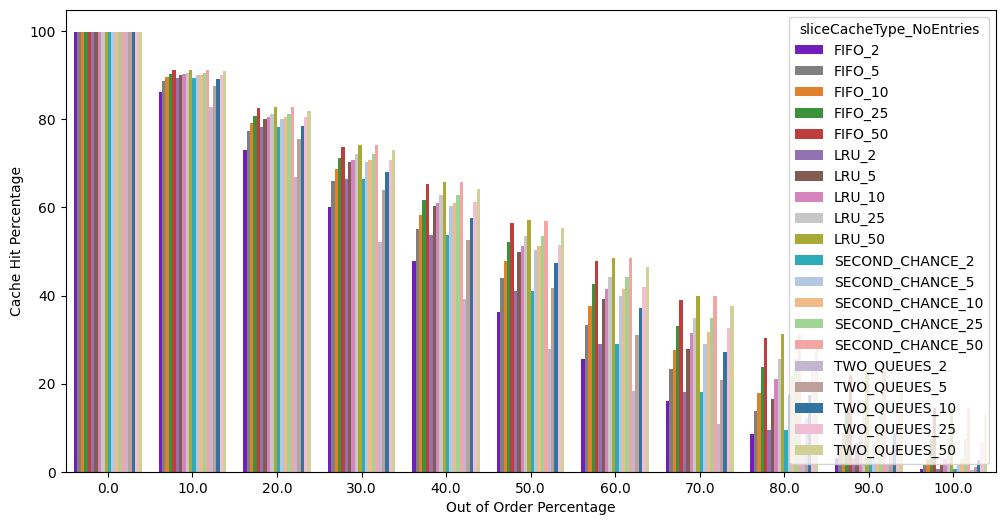

/tmp/ipykernel_60134/1519056251.py:26: UserWarning: The palette list has more values (20) than needed (11), which may not be intended.
  barplot = sns.barplot(x='sliceCacheType_NoEntries', y='cacheHitPercentage', hue='outOfOrderPercentage', palette=custom_palette, data=df)


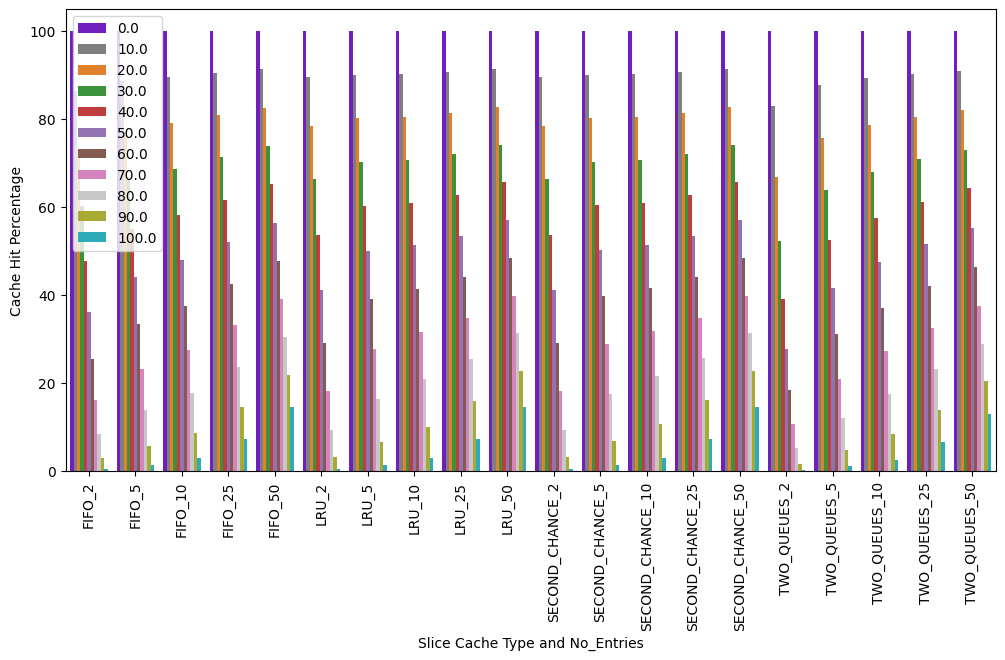

/tmp/ipykernel_60134/1519056251.py:44: UserWarning: The palette list has more values (20) than needed (11), which may not be intended.
  barplot = sns.barplot(x='sliceCacheType_NoEntries', y='throughput_timestamp_per_sec', hue='outOfOrderPercentage', palette=custom_palette, data=df)


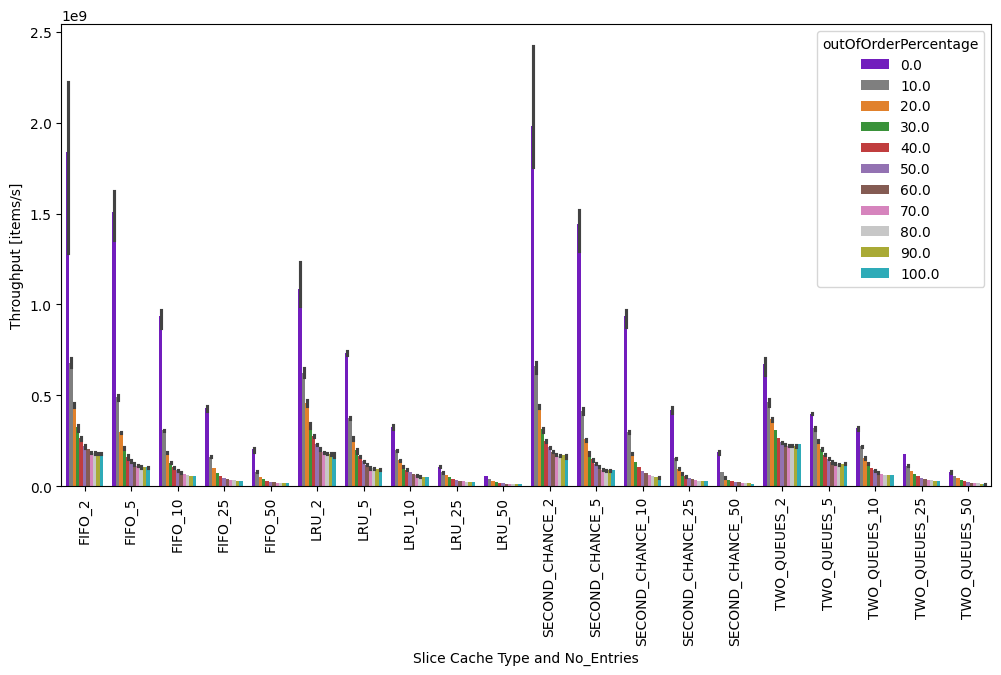

In [3]:
# Create the boxplot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='outOfOrderPercentage', y='cacheHitPercentage', hue='sliceCacheType_NoEntries', palette=custom_palette, data=df)
plt.xlabel('Out of Order Percentage')
plt.ylabel('Cache Hit Percentage')
plt.ylim(bottom=0)

# Write the value over each bar
#for p in barplot.patches:
#    barplot.annotate(f'{p.get_height()*100:.2f}%',
#                     (p.get_x() + p.get_width() / 2., p.get_height()),
#                     ha='center', va='center',
#                     xytext=(0, 9),
#                     textcoords='offset points')

plt.savefig(os.path.join(output_dir, f'slice_cache_cache_hit_percentage_over_out_of_order.pdf'))

# Show the plot
plt.show()

# Extract unique values and corresponding sliceCacheType_NoEntries
unique_values = df.drop_duplicates('optimalCacheHitPercentage')

# Create the boxplot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='sliceCacheType_NoEntries', y='cacheHitPercentage', hue='outOfOrderPercentage', palette=custom_palette, data=df)
   
# Remove duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlabel('Slice Cache Type and No_Entries')
plt.ylabel('Cache Hit Percentage')
plt.ylim(bottom=0)
plt.xticks(rotation=90)
plt.savefig(os.path.join(output_dir, f'slice_cache_cache_hit_percentage_over_slice_caches.pdf'))

# Show the plot
plt.show()

# Create the boxplot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='sliceCacheType_NoEntries', y='throughput_timestamp_per_sec', hue='outOfOrderPercentage', palette=custom_palette, data=df)   
plt.xlabel('Slice Cache Type and No_Entries')
plt.ylabel('Throughput [items/s]')
plt.ylim(bottom=0)
plt.xticks(rotation=90)
plt.savefig(os.path.join(output_dir, f'slice_cache_throughput_timestamp_per_sec_over_slice_caches.pdf'))

# Show the plot
plt.show()

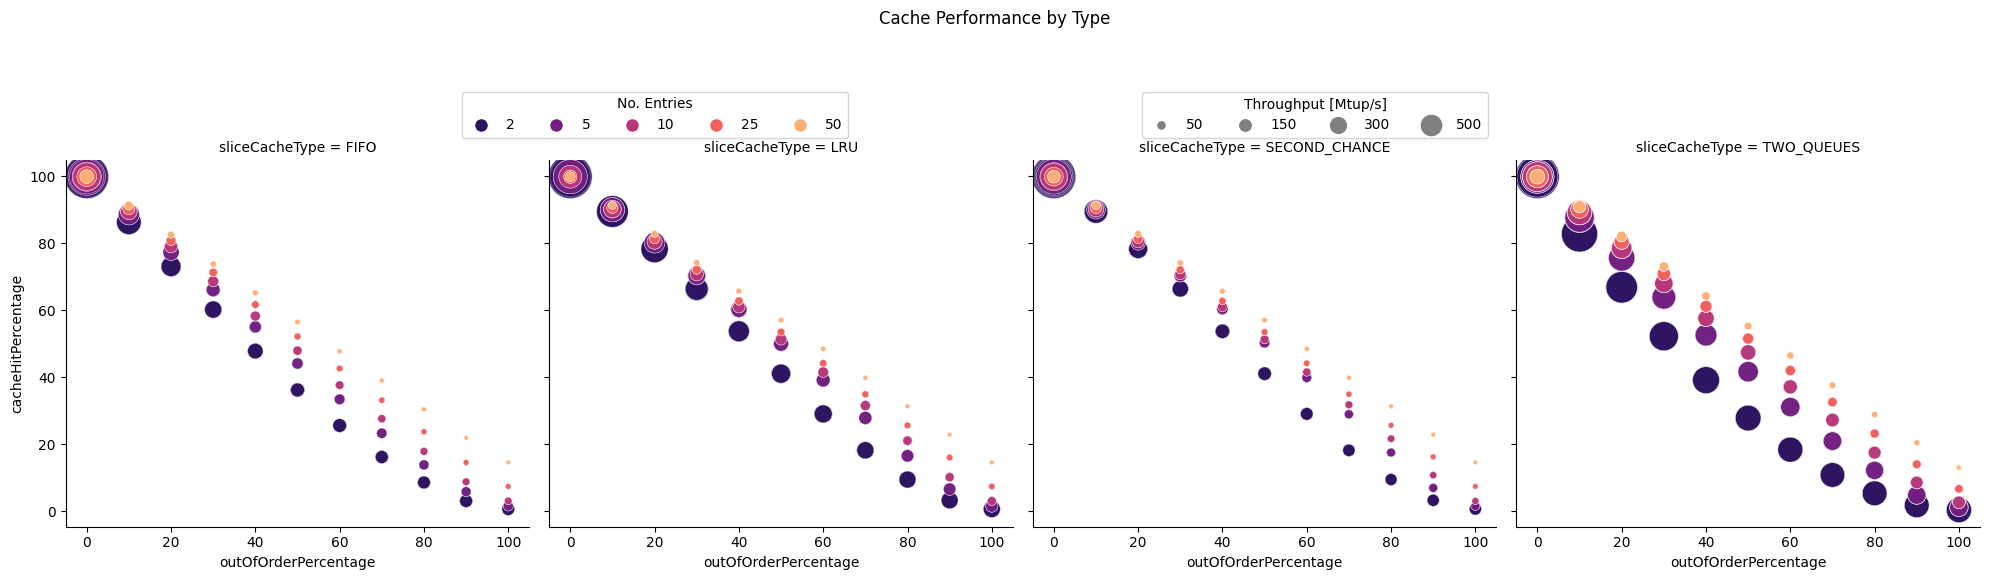

In [4]:
# Create entry-to-color mapping
unique_entries = sorted(df['numberOfEntries'].unique())
palette = sns.color_palette("magma", n_colors=len(unique_entries))  # or use custom_palette
entry_to_color = dict(zip(unique_entries, palette))


# Create the FacetGrid
g = sns.FacetGrid(df, col="sliceCacheType", height=5, aspect=1, col_wrap=4)

# Plot without automatic legend
g.map_dataframe(
    sns.scatterplot,
    x='outOfOrderPercentage',
    y='cacheHitPercentage',
    size='throughput_million_timestamp_per_sec',
    sizes=(10, 1000),
    hue='numberOfEntries',
    alpha=0.75,
    palette=palette,
    legend=False
)


# -- 1. Set your actual size scale used in the scatterplot
min_size, max_size = 10, 1000
throughput_data = df['throughput_million_timestamp_per_sec']

# -- 2. Use a linear norm to map throughput values to marker sizes
# This is what sns.scatterplot(size=..., sizes=(min, max)) does
size_norm = plt.Normalize(throughput_data.min(), throughput_data.max())

def map_throughput_to_size(val):
    return min_size + (max_size - min_size) * size_norm(val)

# -- 3. Select size values to show in legend
throughput_steps = [50, 150, 300, 500]  # or np.linspace(...)

# -- 4. Generate legend handles with exact matching sizes
size_handles = [
    Line2D([0], [0], marker='o', linestyle='None',
           color='gray', markerfacecolor='gray',
           markersize=np.sqrt(map_throughput_to_size(t)),  # sqrt because matplotlib sizes are area-based
           label=f'{t}')
    for t in throughput_steps
]

# -- 5. (Optional) Match hue colors if needed
hue_handles = [
    Line2D([0], [0], marker='o', linestyle='None',
           color='w', markerfacecolor=entry_to_color[entry],
           markersize=10, label=str(entry))
    for entry in unique_entries
]

# -- 6. Add legends to the FacetGrid figure
g.fig.legend(handles=hue_handles, title="No. Entries",
             loc='upper center', bbox_to_anchor=(0.33, 1.0), ncol=len(hue_handles))

g.fig.legend(handles=size_handles, title="Throughput [Mtup/s]",
             loc='upper center', bbox_to_anchor=(0.66, 1.0), ncol=len(size_handles))

# -- 7. Title and layout
g.fig.suptitle("Cache Performance by Type", y=1.15)
plt.subplots_adjust(top=0.85)
plt.show()

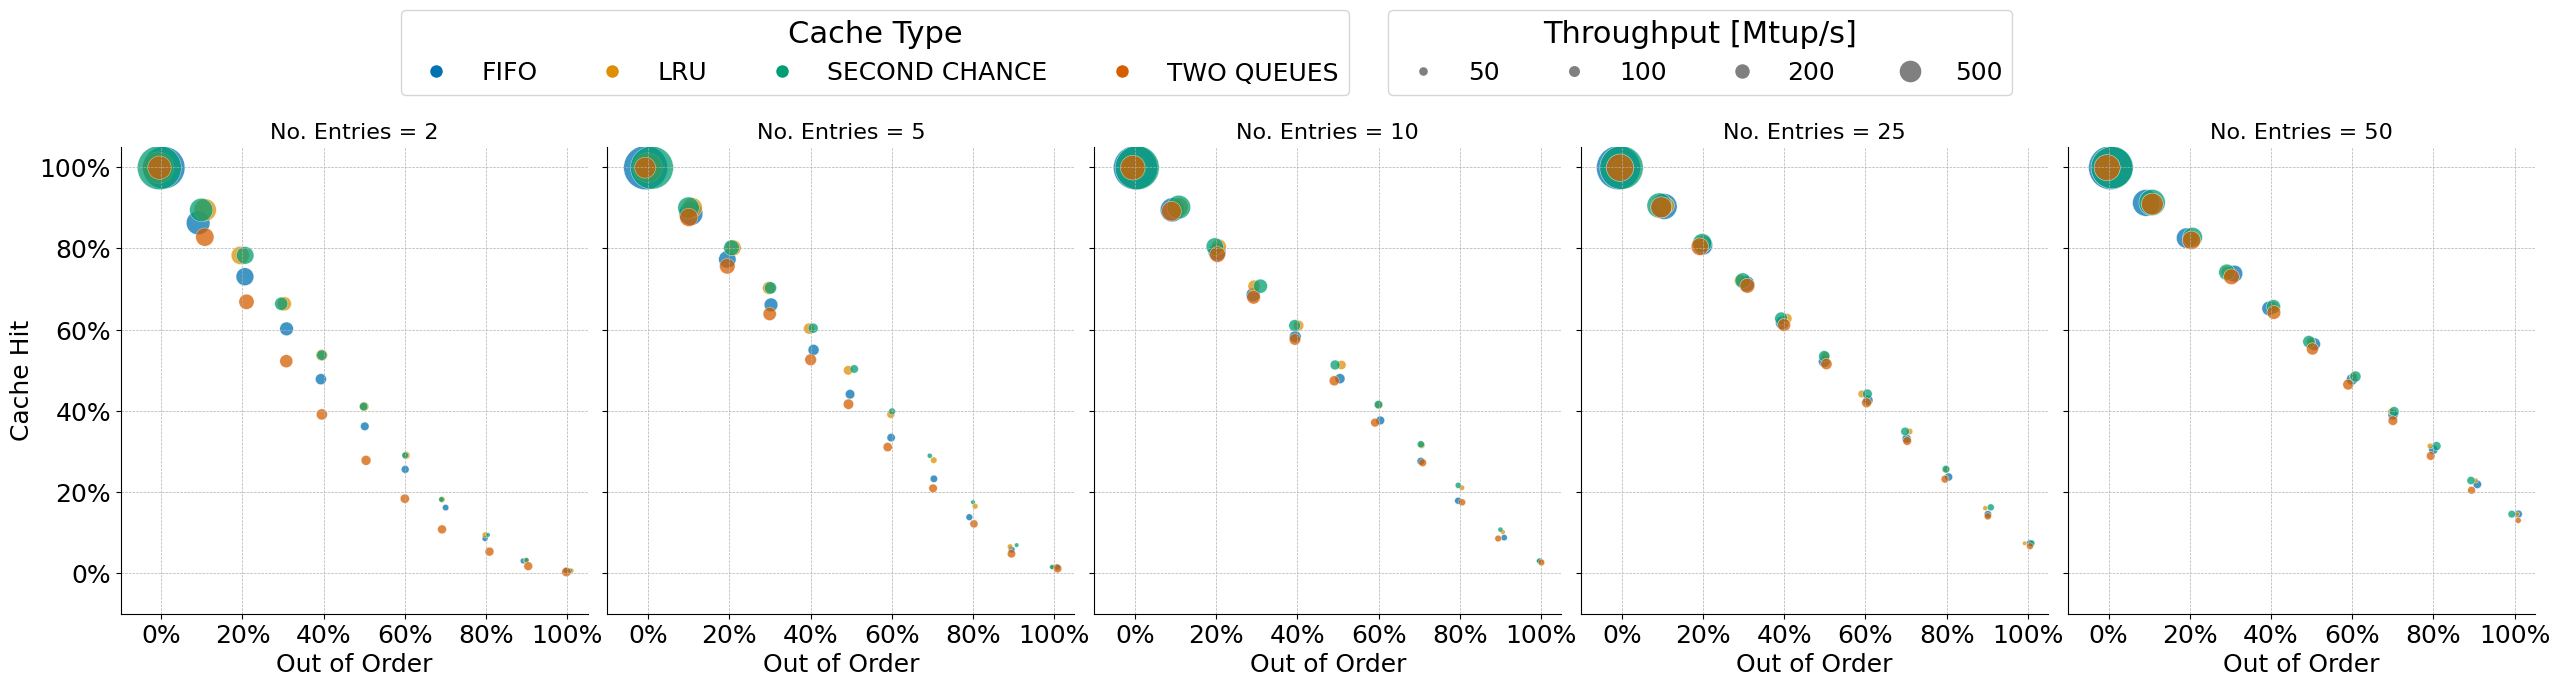

In [5]:
# Unique entries and palette
unique_entries = sorted(df['sliceCacheType'].unique())
palette = sns.color_palette("colorblind", n_colors=len(unique_entries))

# Group by relevant fields and take mean of numeric columns
plot_df = (
    df.groupby(['sliceCacheType', 'numberOfEntries', 'outOfOrderPercentage'], as_index=False)
    .agg({
        'cacheHitPercentage': 'mean',
        'throughput_million_timestamp_per_sec': 'mean'
    })
)

# Create the FacetGrid
g = sns.FacetGrid(plot_df, col="numberOfEntries", height=5, aspect=1, col_wrap=5)

def jittered_scatterplot(data, x, y, hue, size, **kwargs):
    jitter_strength = 1
    jittered_x = data[x] + np.random.uniform(-jitter_strength, jitter_strength, size=len(data))
    sns.scatterplot(
        x=jittered_x,
        y=data[y],
        hue=data[hue],
        size=data[size],
        sizes=(10, 1000),
        **kwargs
    )

# Plot with new size and y-axis mapping
g.map_dataframe(
    jittered_scatterplot,
    x='outOfOrderPercentage',
    y='cacheHitPercentage',
    size='throughput_million_timestamp_per_sec',
    hue='sliceCacheType',
    alpha=0.75,
    palette=palette,
    legend=False
)

# Hue legend (sliceCacheType)
type_to_color = dict(zip(unique_entries, palette))
hue_handles = [
    Line2D([0], [0], marker='o', linestyle='None',
           color='w', markerfacecolor=type_to_color[cache_type],
           markersize=10, label=str(cache_type).replace("_", " "))
    for cache_type in unique_entries
]

# Size legend (throughput)
min_size, max_size = 10, 1000
throughput_data = df['throughput_million_timestamp_per_sec']
size_norm = plt.Normalize(throughput_data.min(), throughput_data.max())

def map_throughput_to_size(val):
    return min_size + (max_size - min_size) * size_norm(val)

throughput_steps = [50, 100, 200, 500]
size_handles = [
    Line2D([0], [0], marker='o', linestyle='None',
           color='gray', markerfacecolor='gray',
           markersize=np.sqrt(map_throughput_to_size(t)),
           label=f'{t}')
    for t in throughput_steps
]

# Add custom legends with increased font size
font_properties = FontProperties()
font_properties.set_size(22)

# Add custom legends with increased font size
g.fig.legend(handles=hue_handles, title="Cache Type", title_fontproperties=font_properties,
             fontsize=18, loc='upper center', bbox_to_anchor=(0.33, 1.35), ncol=len(hue_handles))
g.fig.legend(handles=size_handles, title="Throughput [Mtup/s]", title_fontproperties=font_properties,
             fontsize=18, loc='upper center', bbox_to_anchor=(0.66, 1.35), ncol=len(size_handles))

# Adjust the font size for x and y labels, ticks, and facet titles
for ax, val in zip(g.axes.flat, sorted(plot_df['numberOfEntries'].unique())):
    ax.set_xlabel("Out of Order", fontsize=18)
    ax.set_ylabel("Cache Hit", fontsize=18)
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)

    # Set x and y axis limits and ticks
    ax.set_xlim(-10, 105)  # Add space before 0 and after 100
    ax.set_ylim(-10, 105)  # Add space before 0 and after 100
    ax.set_xticks(np.arange(0, 101, 20))  # Set ticks from 0 to 100 with a step of 20
    ax.set_yticks(np.arange(0, 101, 20))  # Set ticks from 0 to 100 with a step of 20
    ax.set_xticklabels([f'{int(tick)}%' for tick in np.arange(0, 101, 20)])
    ax.set_yticklabels([f'{int(tick)}%' for tick in np.arange(0, 101, 20)])

    # Set custom title for each subplot
    ax.set_title(f"No. Entries = {val}", fontsize=16)
    ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5)
    
# Adjust layout
plt.subplots_adjust(top=1.05)


# Save and show plot
plt.savefig(os.path.join(output_dir, f'slice_cache_scatter_plots_cache_hit_percentage_over_out_of_orderness.pdf'), bbox_inches='tight')
plt.show()


In [6]:
%%script echo skipping
tmp_df = df[df['windowSizeSlide'] == "100_100"]
plot_catplot_with_subfigures(tmp_df,
                             x='sliceCacheType',
                             y='cacheHitPercentageFromOptimal',
                             hue='numberOfEntries',
                             row='outOfOrderPercentage',
                             col='minMaxDelay',
                             sharey=False,
                             appendix="100_100")
plot_catplot_with_subfigures(tmp_df,
                             x='sliceCacheType',
                             y='throughput_million_timestamp_per_sec',
                             hue='numberOfEntries',
                             row='outOfOrderPercentage',
                             col='minMaxDelay',
                             sharey=False,
                             appendix="100_100")
plot_catplot_with_subfigures(tmp_df,
                             x='sliceCacheType',
                             y='cacheHitPercentage',
                             hue='numberOfEntries',
                             row='outOfOrderPercentage',
                             col='minMaxDelay',
                             sharey=True,
                             appendix="100_100")

skipping


/tmp/ipykernel_60134/871040268.py:59: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.97])  # Leave space for legend


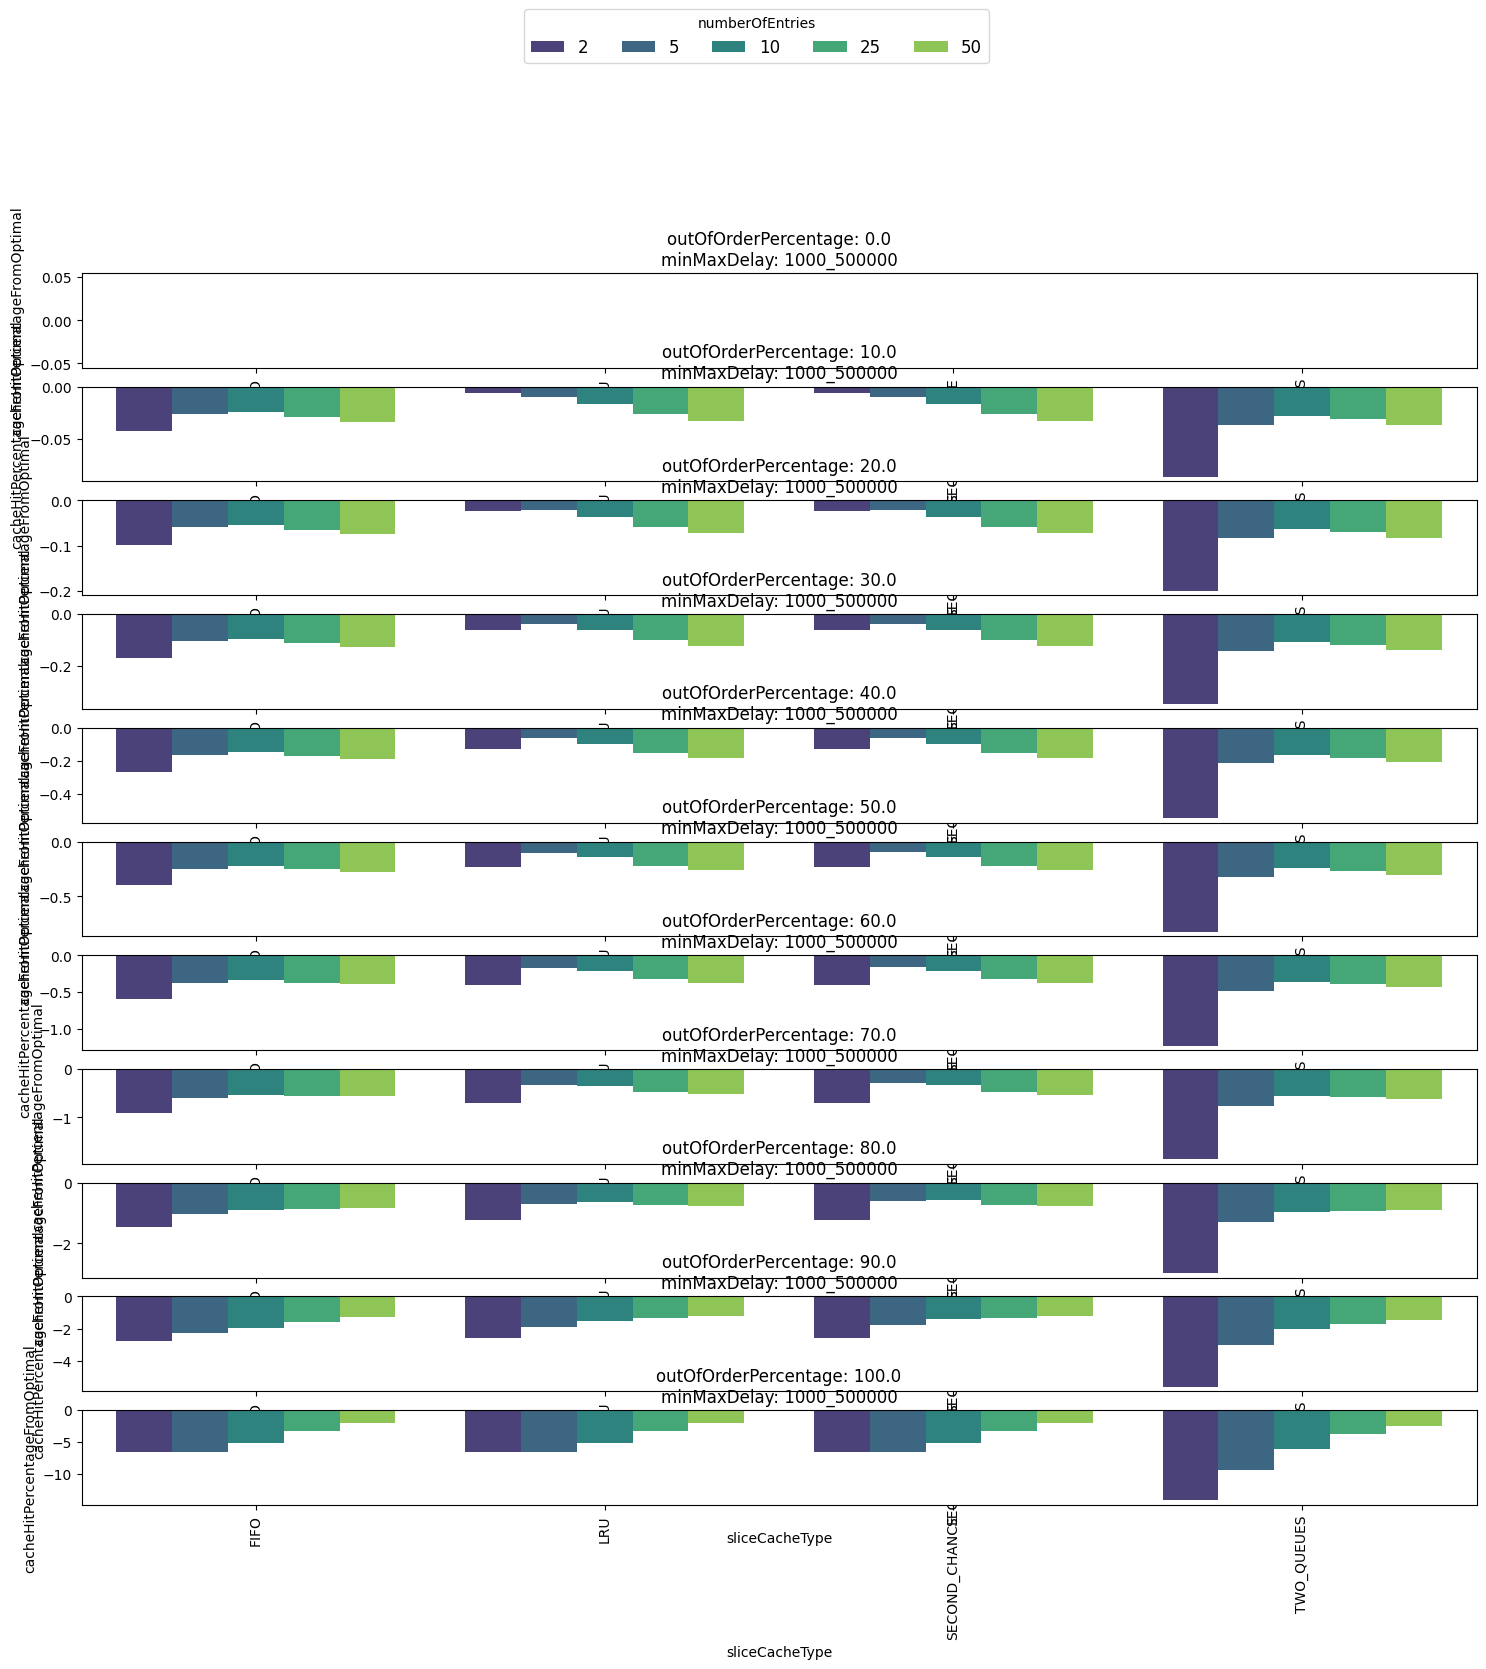

/tmp/ipykernel_60134/871040268.py:59: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.97])  # Leave space for legend


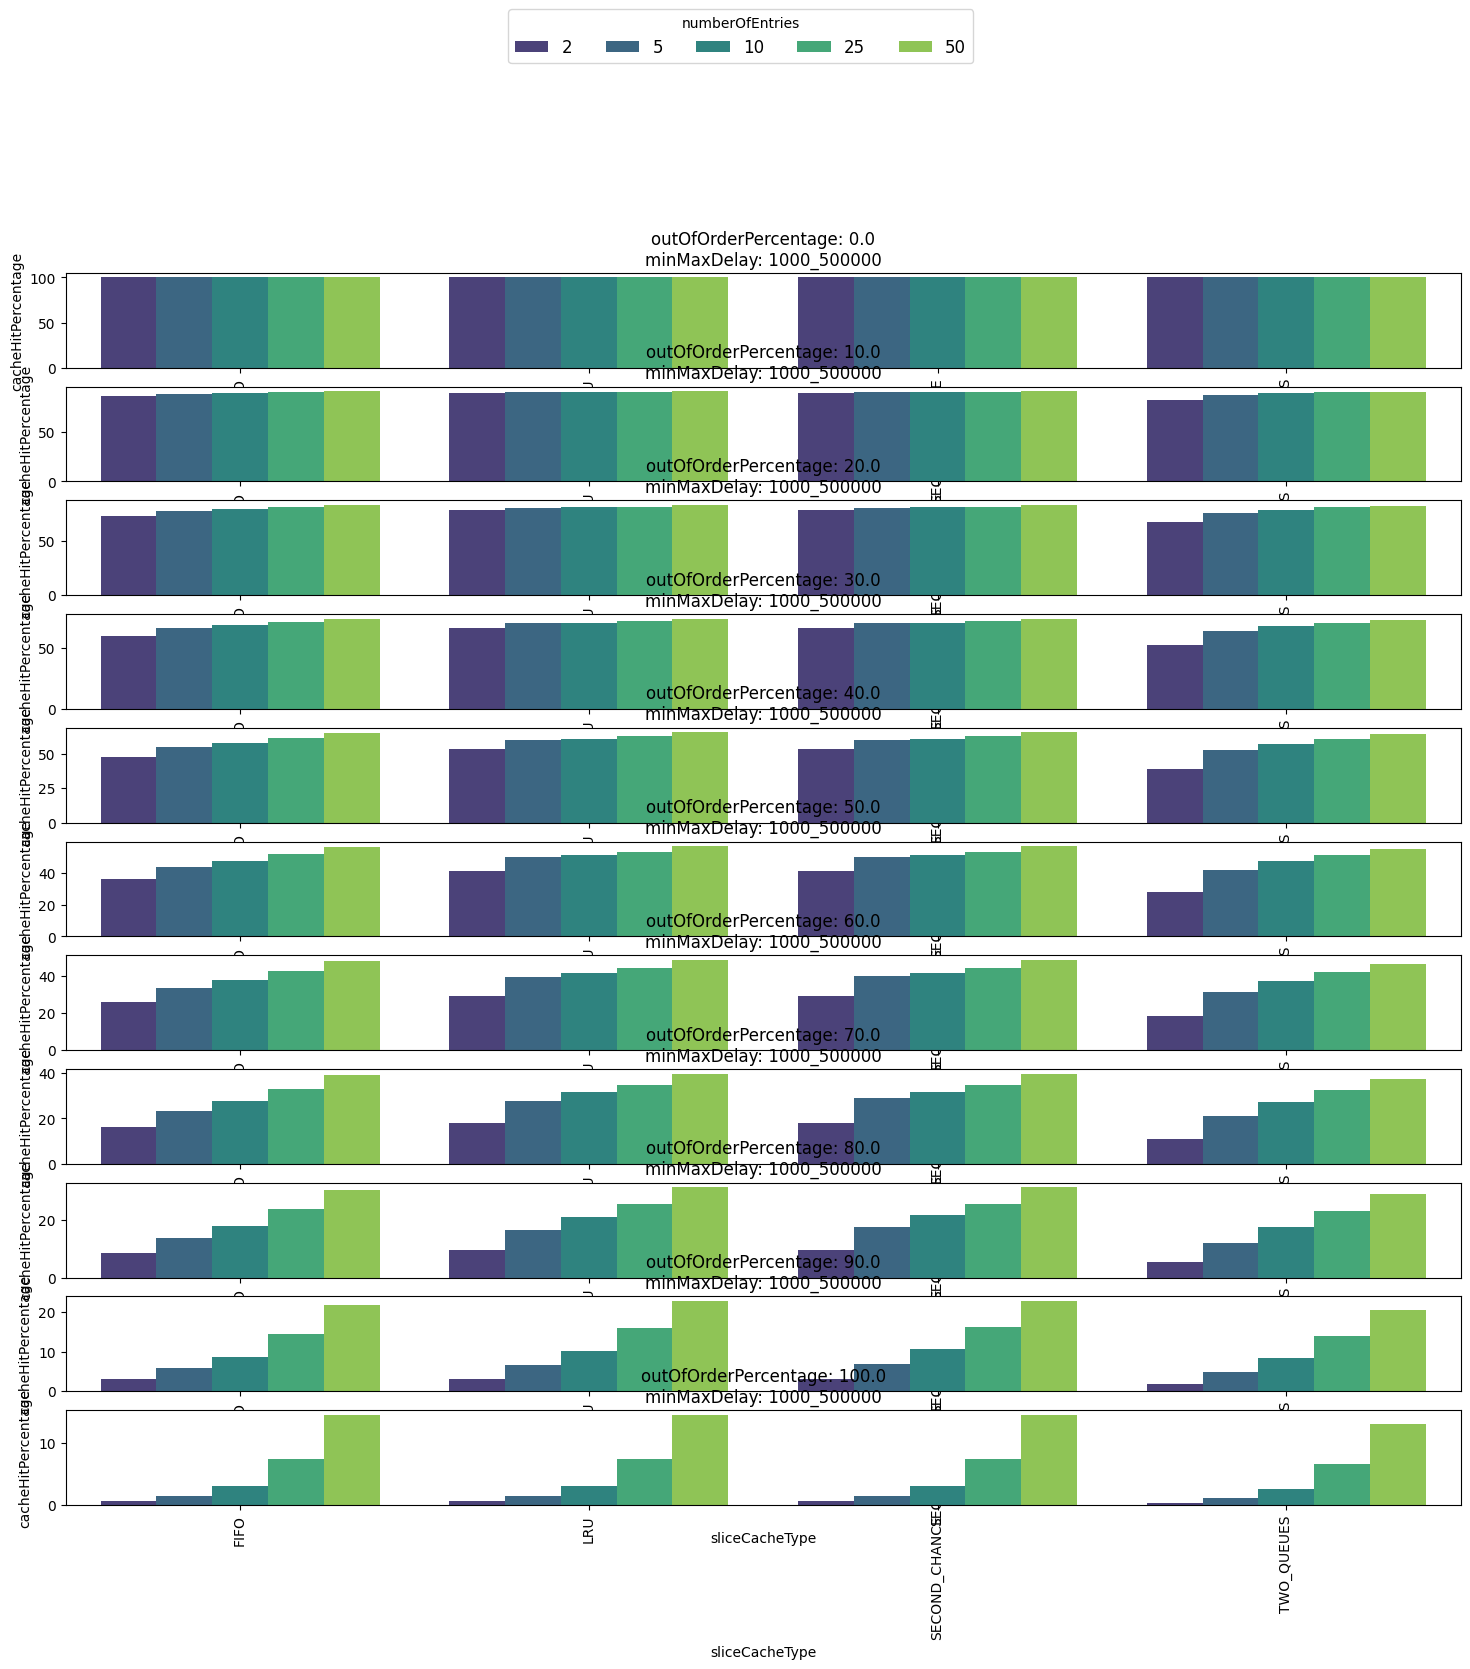

/tmp/ipykernel_60134/871040268.py:59: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0, 1, 0.97])  # Leave space for legend


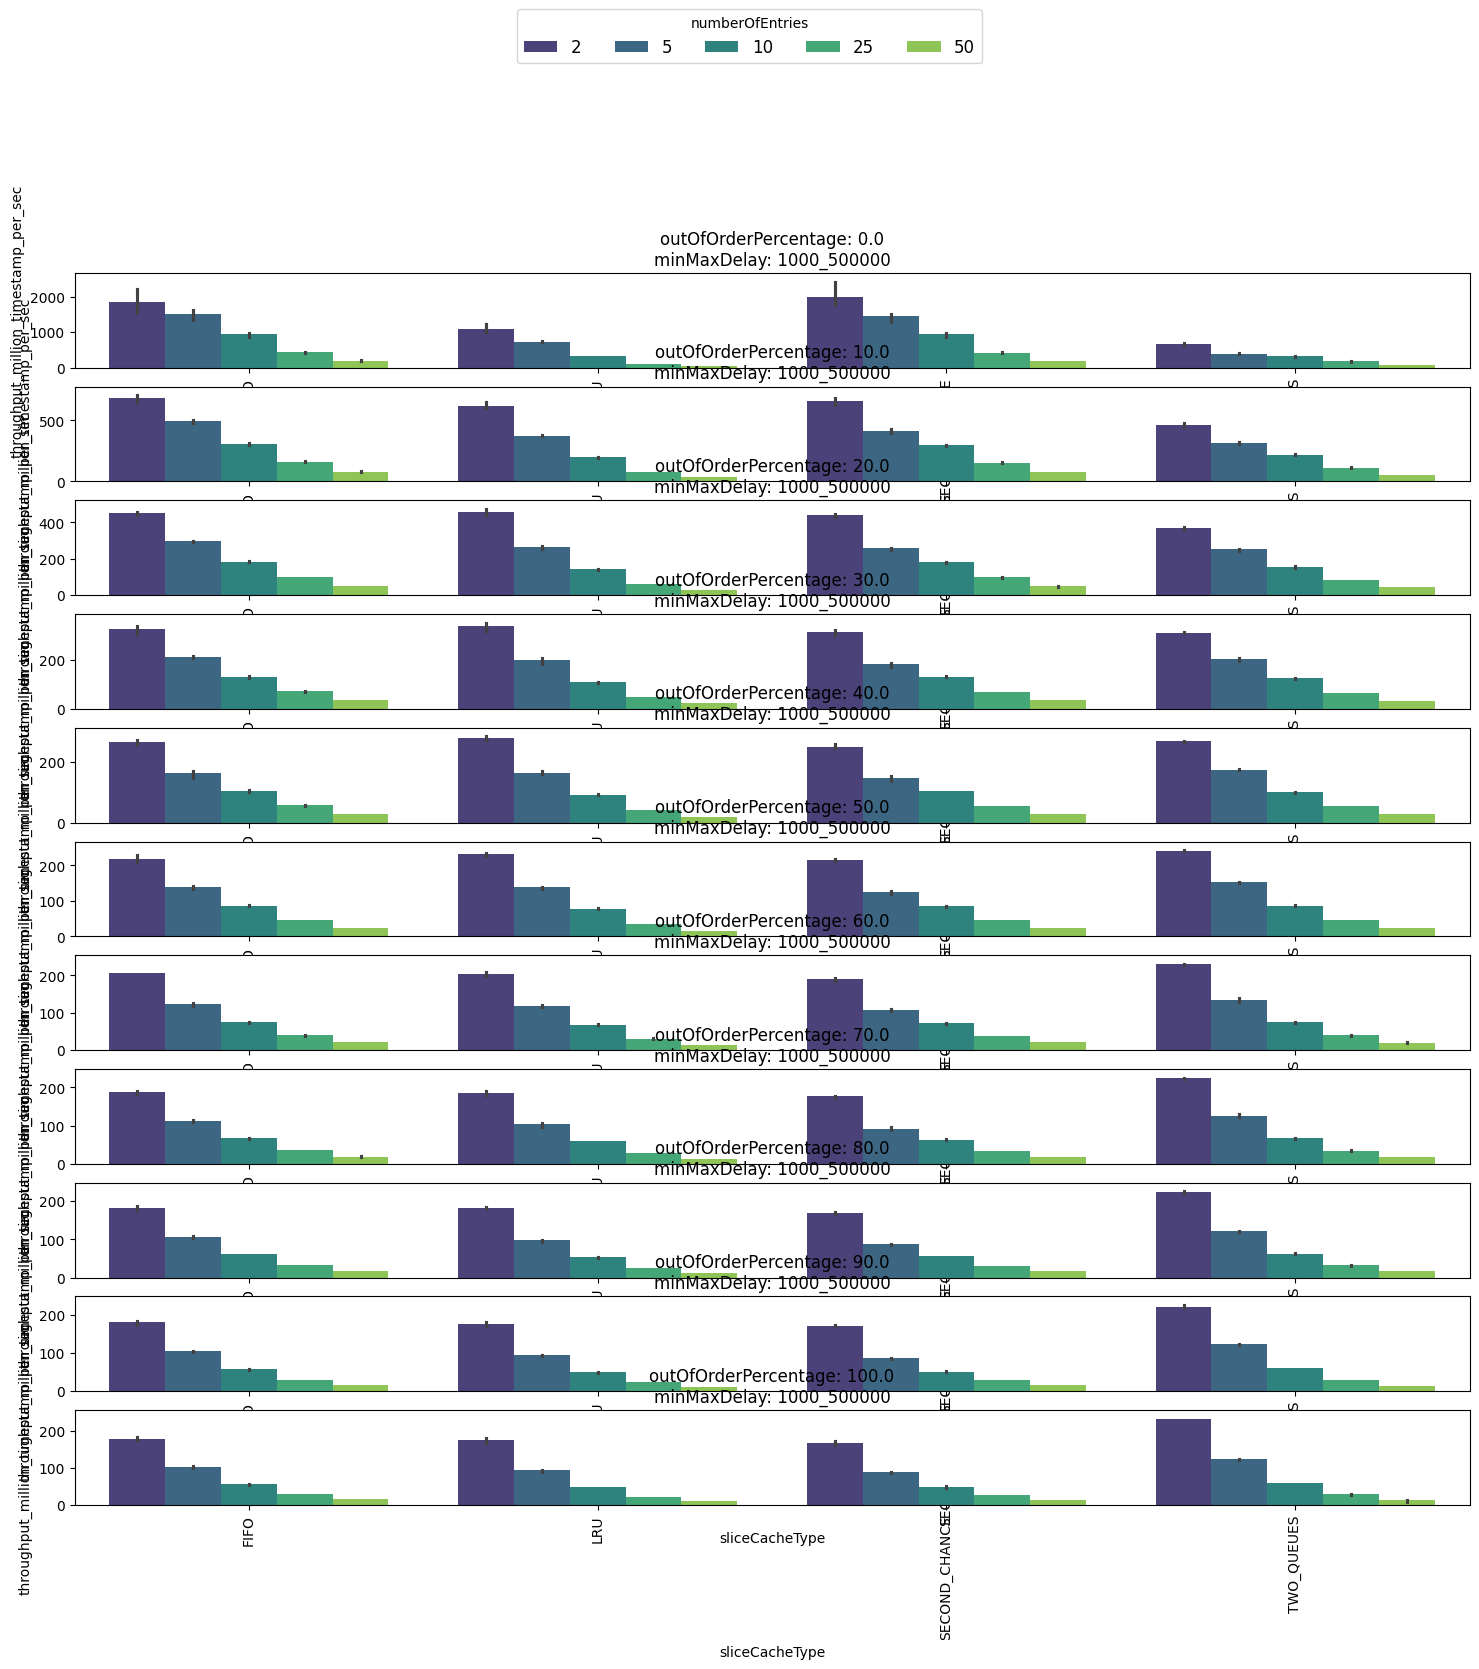

In [7]:
tmp_df = df[df['windowSizeSlide'] == "1000_1000"]
plot_catplot_with_subfigures(tmp_df,
                             x='sliceCacheType',
                             y='cacheHitPercentageFromOptimal',
                             hue='numberOfEntries',
                             row='outOfOrderPercentage',
                             col='minMaxDelay',
                             sharey=False,
                             appendix="1000_1000")
plot_catplot_with_subfigures(tmp_df,
                             x='sliceCacheType',
                             y='cacheHitPercentage',
                             hue='numberOfEntries',
                             row='outOfOrderPercentage',
                             col='minMaxDelay',
                             sharey=False,
                             appendix="1000_1000")
plot_catplot_with_subfigures(tmp_df,
                             x='sliceCacheType',
                             y='throughput_million_timestamp_per_sec',
                             hue='numberOfEntries',
                             row='outOfOrderPercentage',
                             col='minMaxDelay',
                             sharey=True,
                             appendix="1000_1000")

In [8]:
%%script echo skipping
tmp_df = df[df['windowSizeSlide'] == "10000_10000"]
plot_catplot_with_subfigures(tmp_df,
                             x='sliceCacheType',
                             y='cacheHitPercentageFromOptimal',
                             hue='numberOfEntries',
                             row='outOfOrderPercentage',
                             col='minMaxDelay',
                             sharey=False,
                             appendix="10000_10000")
plot_catplot_with_subfigures(tmp_df,
                             x='sliceCacheType',
                             y='cacheHitPercentage',
                             hue='numberOfEntries',
                             row='outOfOrderPercentage',
                             col='minMaxDelay',
                             sharey=False,
                             appendix="10000_10000")
plot_catplot_with_subfigures(tmp_df,
                             x='sliceCacheType',
                             y='throughput_million_timestamp_per_sec',
                             hue='numberOfEntries',
                             row='outOfOrderPercentage',
                             col='minMaxDelay',
                             sharey=True,
                             appendix="10000_10000")

skipping


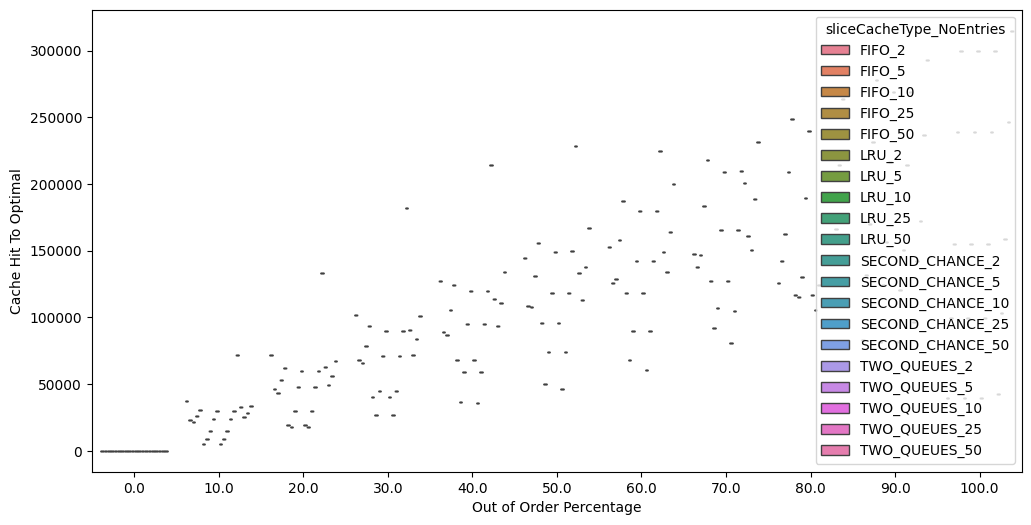

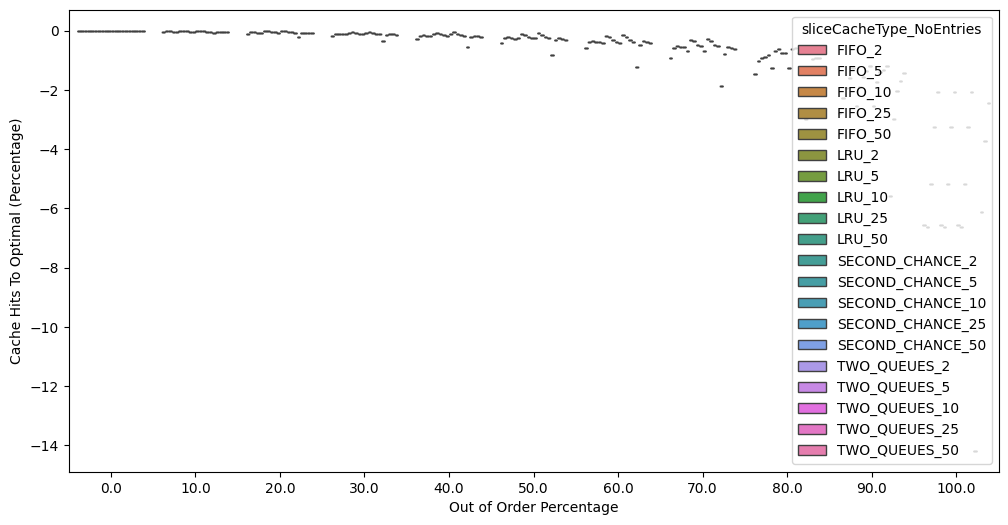

In [9]:
# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='outOfOrderPercentage', y='absoluteCacheHitsFromOptimal', hue='sliceCacheType_NoEntries', data=df)
plt.xlabel('Out of Order Percentage')
plt.ylabel('Cache Hit To Optimal')

# Show the plot
plt.show()

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='outOfOrderPercentage', y='cacheHitPercentageFromOptimal', hue='sliceCacheType_NoEntries', data=df)
plt.xlabel('Out of Order Percentage')
#plt.yscale('log')
plt.ylabel('Cache Hits To Optimal (Percentage)')

# Show the plot
plt.show()

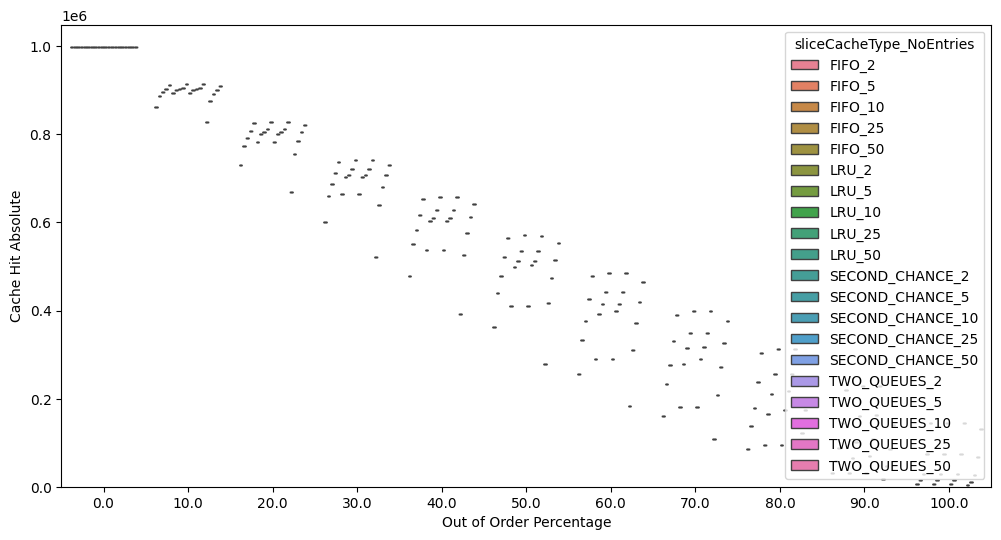

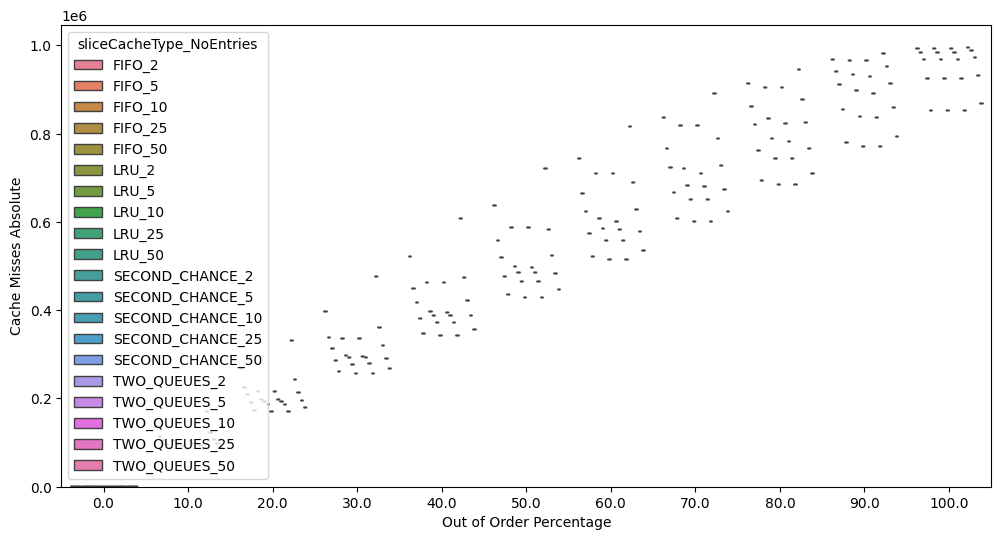

In [10]:
# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='outOfOrderPercentage', y='cacheHits', hue='sliceCacheType_NoEntries', data=df)
plt.xlabel('Out of Order Percentage')
plt.ylabel('Cache Hit Absolute')
plt.ylim(bottom=0)

# Show the plot
plt.show()

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='outOfOrderPercentage', y='cacheMisses', hue='sliceCacheType_NoEntries', data=df)
plt.xlabel('Out of Order Percentage')
plt.ylabel('Cache Misses Absolute')
plt.ylim(bottom=0)

# Show the plot
plt.show()

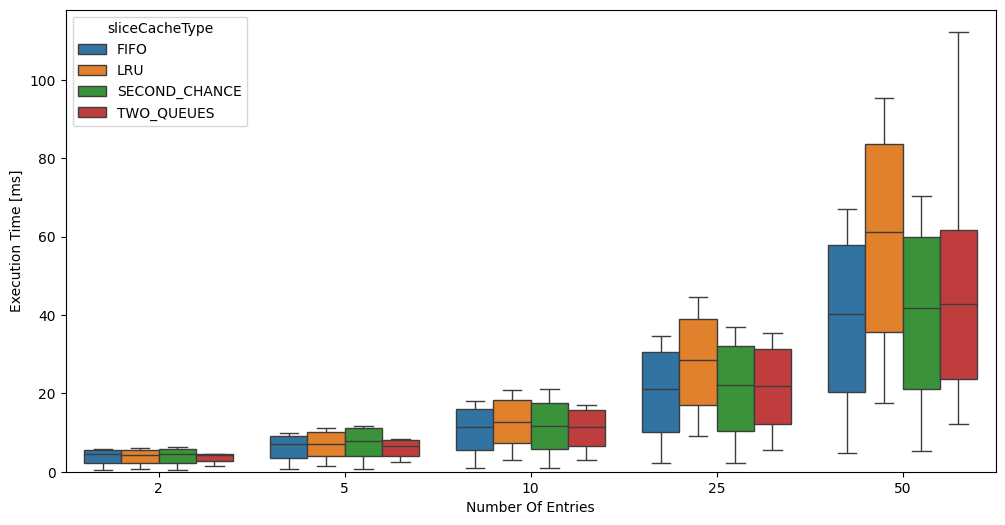

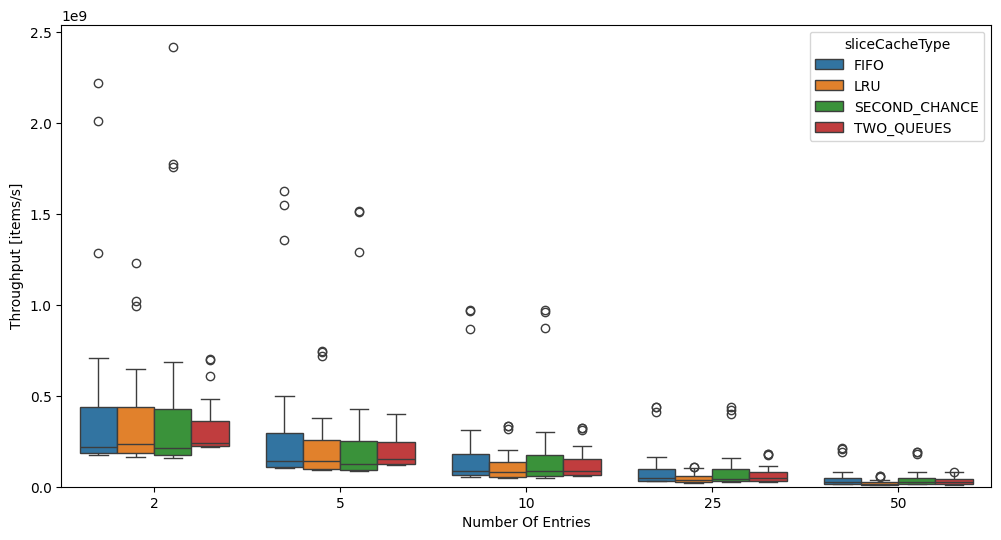

In [11]:

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='numberOfEntries', y='executionTime_in_ms', hue='sliceCacheType', data=df)
plt.xlabel('Number Of Entries')
plt.ylabel('Execution Time [ms]')
plt.ylim(bottom=0)
#plt.yscale('log')

# Show the plot
plt.show()

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='numberOfEntries', y='throughput_timestamp_per_sec', hue='sliceCacheType', data=df)
plt.xlabel('Number Of Entries')
plt.ylabel('Throughput [items/s]')
plt.ylim(bottom=0)
#plt.yscale('log')

# Show the plot
plt.show()

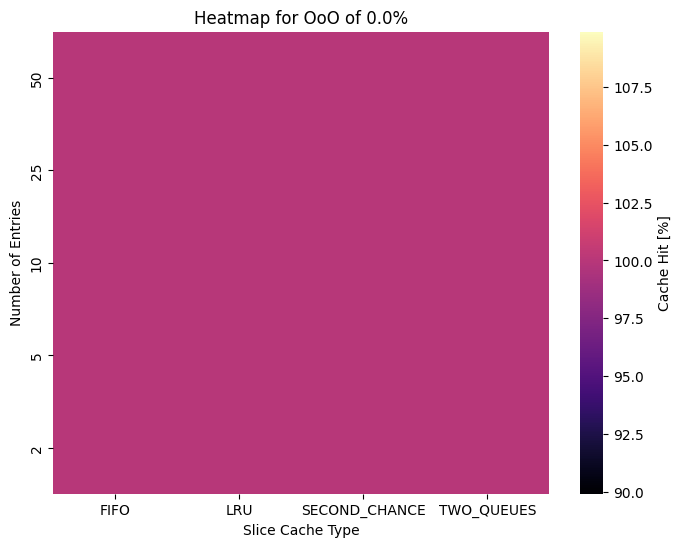

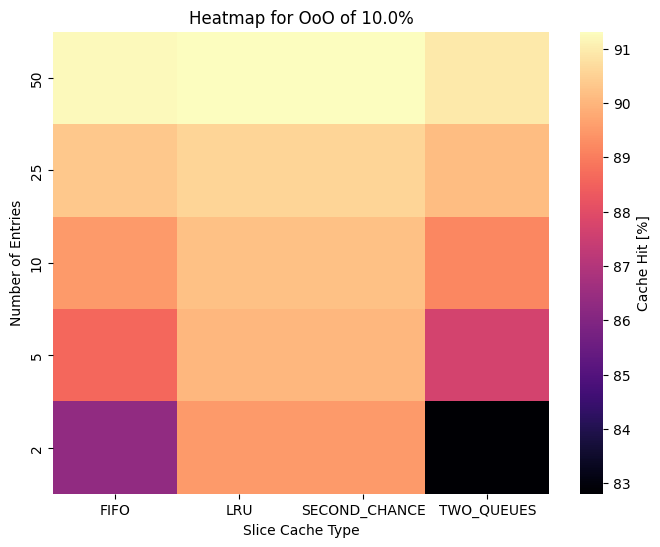

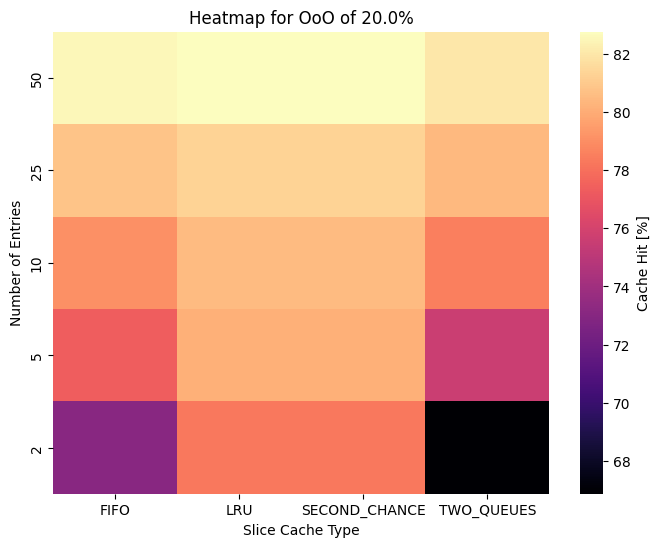

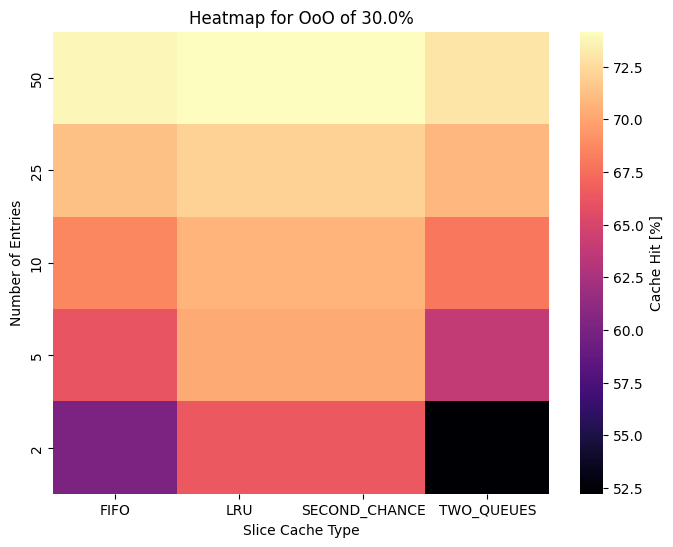

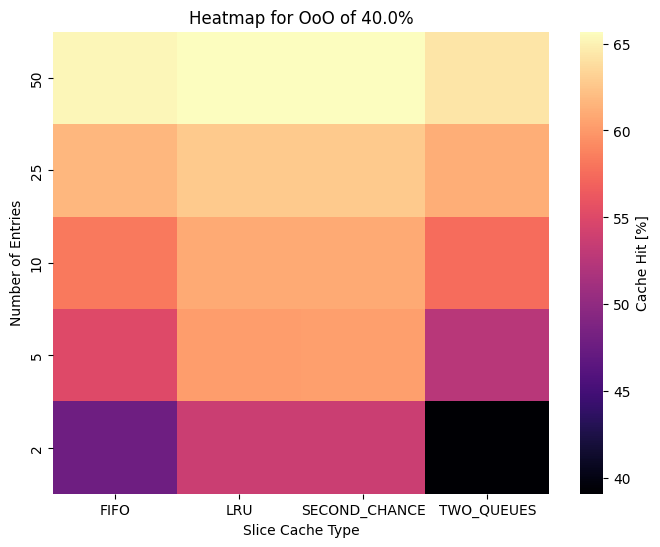

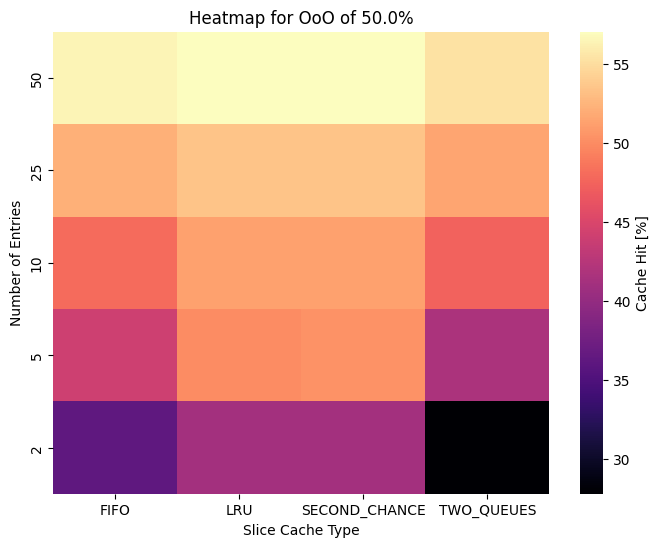

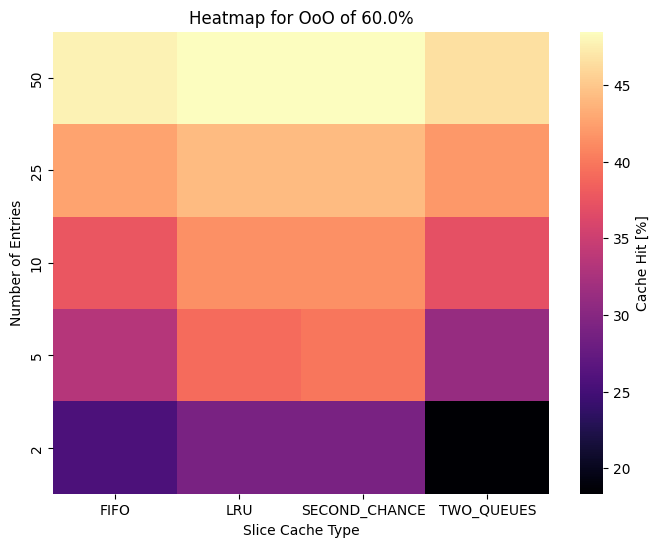

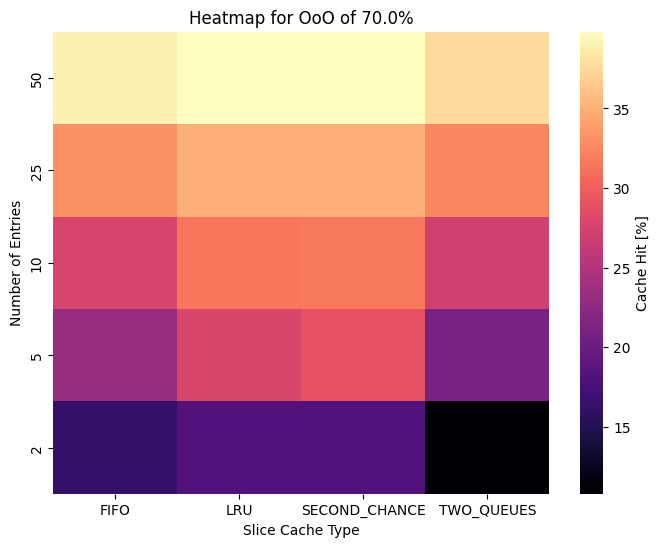

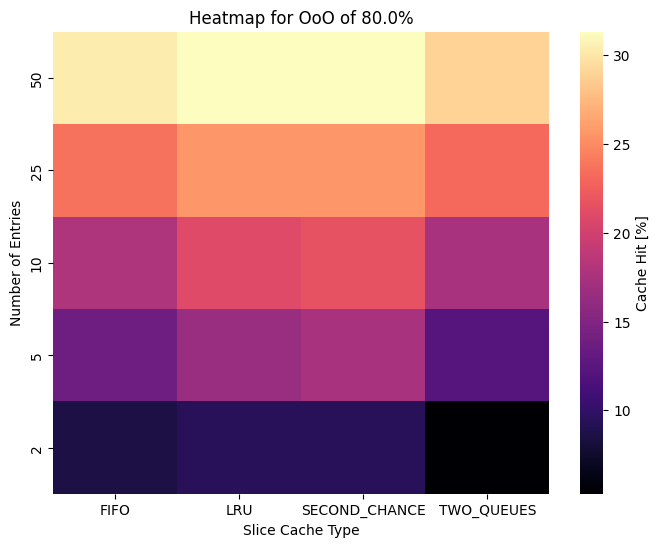

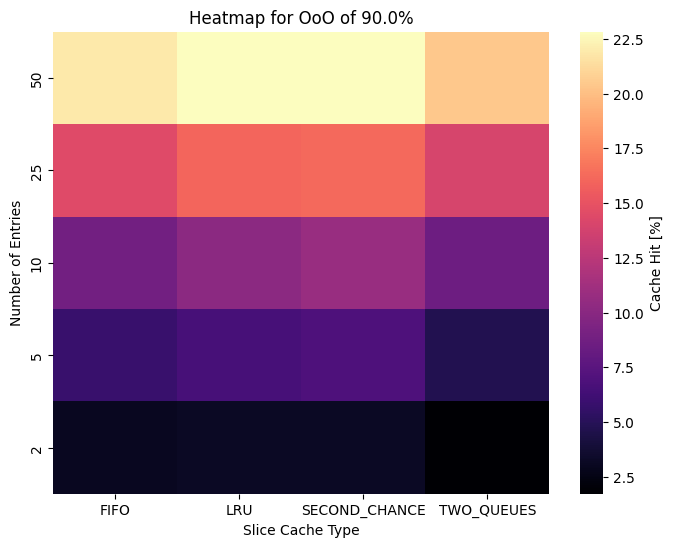

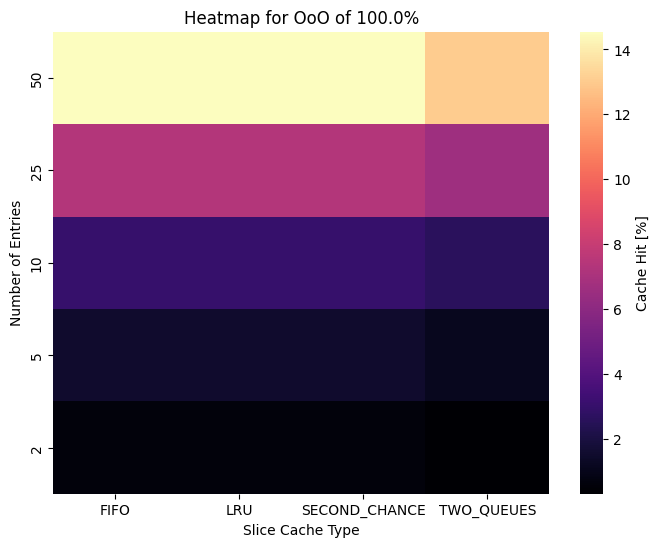

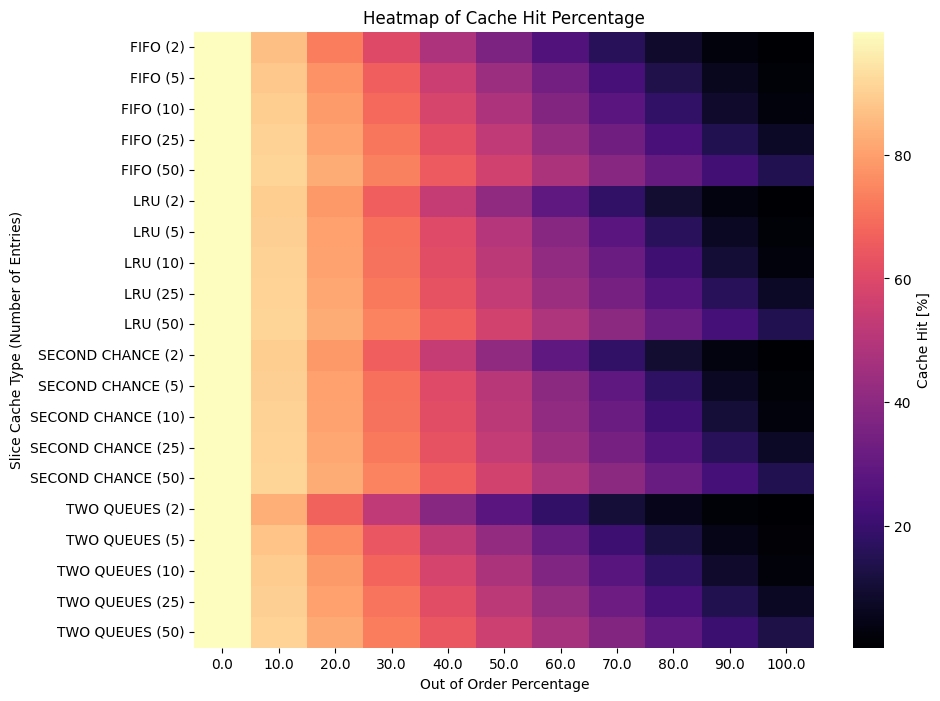

In [12]:
# Pivot the data to create a matrix for each sliceCacheType
def create_heatmap(data, out_of_order):
    pivot_data = data[data['outOfOrderPercentage'] == out_of_order].pivot_table(
        index='numberOfEntries',
        columns='sliceCacheType',
        values='cacheHitPercentage',
        aggfunc='mean'
    )
    return pivot_data

def column_sort_key(col):
    is_optimal = 'Optimal' in col
    return (is_optimal, col)

# Function to transform labels FIFO_2 --> FIFO (2)
def transform_label_sliceCacheType_NoEntries(label):
    parts = label.rsplit('_', 1)
    parts[0] = parts[0].replace("_", " ")
    if len(parts) == 2:
        return f"{parts[0]} ({parts[1]})"
    return label

# Get unique sliceCacheType values
unique_out_of_order = sorted(df['outOfOrderPercentage'].unique())

# Create a heatmap for each unique sliceCacheType
for out_of_order in unique_out_of_order:
    plt.figure(figsize=(8, 6))
    heatmap_data = create_heatmap(df, out_of_order)
    heatmap_data.sort_index(ascending=False, inplace=True)
    sorted_columns = sorted(heatmap_data.columns, key=column_sort_key)
    heatmap_data = heatmap_data[sorted_columns]
    sns.heatmap(heatmap_data, cmap='magma', cbar_kws={'label': 'Cache Hit [%]'})
    plt.title(f'Heatmap for OoO of {out_of_order}%')
    plt.xlabel('Slice Cache Type')
    plt.ylabel('Number of Entries')
    plt.show()



# Pivot the data to create a matrix for the heatmap
heatmap_data = df.pivot_table(
    index='sliceCacheType_NoEntries',
    columns='outOfOrderPercentage',
    values='cacheHitPercentage',
    aggfunc='mean'
)
heatmap_data = heatmap_data.loc[sorted(heatmap_data.index, key=sorting_key)]
heatmap_data = heatmap_data.rename(index=transform_label_sliceCacheType_NoEntries)
# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='magma', cbar_kws={'label': 'Cache Hit [%]'})
plt.title('Heatmap of Cache Hit Percentage')
plt.xlabel('Out of Order Percentage')
plt.ylabel('Slice Cache Type (Number of Entries)')
plt.show()